**Project 5**:

HELP International has been able to raise around $ 10 million. Now the CEO of the NGO needs
to decide how to use this money strategically and effectively. So, the CEO has to make a decision
to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to
categorize the countries using some **socio-economic** and **health factors** that determine the overall
development of the country. Your objective is to **categorize** the countries using **socio-economic and health factors** that determine the overall development of the country.

For this problem we are using dataset [Country_Data](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data) from kaggle.

Importing useful libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
!pip install -U kaleido
import kaleido
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Importing dataset

In [ ]:
data = pd.read_csv("/content/Country-data.xls")       #Importing dataset
desc = np.array(pd.read_csv("/content/data-dictionary.xls"))
country = np.array(data['country'])

In [ ]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


#Data Analysis

In [ ]:
#Number of rows and columns, and description of features
print(f"Number of rows and columns : {data.shape[0]},{data.shape[1]} \n")
print(f"Description of columns : \n")
for i in desc:
  print(f"{i[0]} -> {i[1]}")

Number of rows and columns : 167,10 

Description of columns : 

country -> Name of the country
child_mort -> Death of children under 5 years of age per 1000 live births
exports -> Exports of goods and services per capita. Given as %age of the GDP per capita
health -> Total health spending per capita. Given as %age of GDP per capita
imports -> Imports of goods and services per capita. Given as %age of the GDP per capita
Income -> Net income per person
Inflation -> The measurement of the annual growth rate of the Total GDP
life_expec -> The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer -> The number of children that would be born to each woman if the current age-fertility rates remain the same.
gdpp -> The GDP per capita. Calculated as the Total GDP divided by the total population.


In [ ]:
#Columns/features
print(f"Columns : \n {data.columns} \n")

#Info of columns
print("Info :")
data.info()

Columns : 
 Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object') 

Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
#Dropping unnecessary column
data = data.drop("country",axis = 1)

<Axes: >

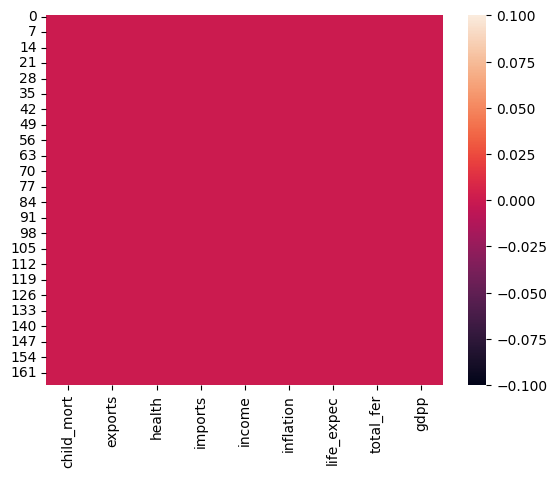

In [ ]:
#Heat map of null values
sns.heatmap(data.isnull())

Implies no null values

In [ ]:
#Number of null values
print(f"Null values :\n {data.isnull().sum()}")

Null values :
 child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [ ]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<Axes: >

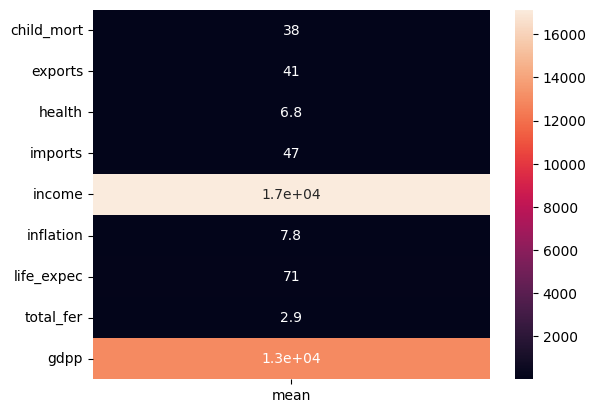

In [ ]:
#Mean of all features
sns.heatmap(data.describe().T[['mean']] , annot = True)

<Axes: >

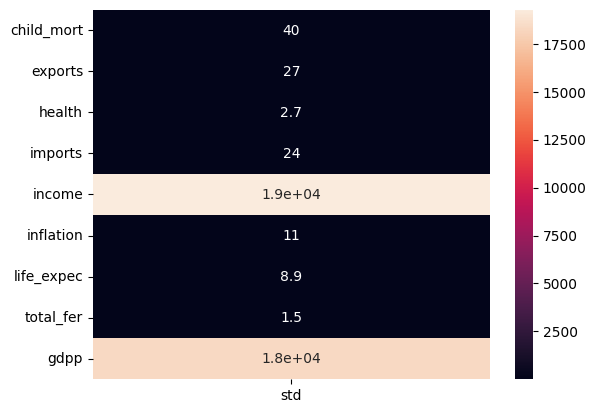

In [ ]:
#Std of all features
sns.heatmap(data.describe().T[['std']] , annot = True)

In [ ]:
#Countries with minimum and maximum feature values
cols = [i for i in data.columns]
min1 = ["{}({})".format(country[ np.argmin(data[i]) ] , data[i][np.argmin(data[i])]) for i in cols]
max1 = ["{}({})".format(country[ np.argmax(data[i]) ] , data[i][np.argmax(data[i])]) for i in cols]

table = {"" : cols , 'min' : min1 , 'max' : max1 , 'avg' : data.describe().T['mean']}
table_ = tabulate(table , headers = 'keys' , tablefmt='fancy_grid')
print(table_)

╒════════════╤═══════════════════════╤═════════════════════╤═════════════╕
│            │ min                   │ max                 │         avg │
╞════════════╪═══════════════════════╪═════════════════════╪═════════════╡
│ child_mort │ Iceland(2.6)          │ Haiti(208.0)        │    38.2701  │
├────────────┼───────────────────────┼─────────────────────┼─────────────┤
│ exports    │ Myanmar(0.109)        │ Singapore(200.0)    │    41.109   │
├────────────┼───────────────────────┼─────────────────────┼─────────────┤
│ health     │ Qatar(1.81)           │ United States(17.9) │     6.81569 │
├────────────┼───────────────────────┼─────────────────────┼─────────────┤
│ imports    │ Myanmar(0.0659)       │ Singapore(174.0)    │    46.8902  │
├────────────┼───────────────────────┼─────────────────────┼─────────────┤
│ income     │ Congo, Dem. Rep.(609) │ Qatar(125000)       │ 17144.7     │
├────────────┼───────────────────────┼─────────────────────┼─────────────┤
│ inflation  │ Seychelles

Now the key features of socio-economically bakcward countries are:


*   High child_mort
*   Low Exports and Imports
*   Low health facilities
*   Low income
*   Low life expectancy
*   Low GDP per population







#Some function definitions:

In [ ]:
def scale_it(data):
  #Scaler
  scaler = MinMaxScaler()

  #Normalising each column independently
  for i in data.columns:
    data[i] = scaler.fit_transform(data[[i]])

  return data

def explained_variance_graph(data):
  #PCA
  pca = PCA()
  pca.fit(data)

  #We can get explained variance ratio by using explained_variance_ratio_ atrribute
  variance = pca.explained_variance_ratio_

  #Step and line plot
  plt.step(range(0,data.shape[1] + 1) , np.cumsum([0] + list(variance)) , where = 'post')
  plt.plot(range(0,data.shape[1] + 1) , np.cumsum([0] + list(variance)) , marker = '*' , markersize = 10)
  plt.yticks(np.arange(0 , 1.05 , 0.05))
  plt.grid()
  plt.xlabel('n_components')
  plt.ylabel('Explained Variance')
  plt.show()

def elbow_and_silhouette_graph(data):
  #Taking k_range between [2,10]
  k_range = range(2, 10)

  #Sum of squared distances of points from cluster centroid
  sum_sqr_dist = []
  slh_arr = []
  for k in k_range:
      kmeans = KMeans(n_clusters=k,n_init=10)
      kmeans.fit(data)
      sum_sqr_dist.append(kmeans.inertia_)
      slh_arr.append(silhouette_score(data, kmeans.labels_))

  #Plotting elbow curve
  plt.plot(k_range, sum_sqr_dist)
  plt.title('Elbow Method')
  plt.xlabel('Number of clusters (k)')
  plt.ylabel('sum_sqr_dist')
  plt.show()

  #Plotting silhouette scores
  plt.plot(k_range, slh_arr)
  plt.title('Silhoutte method')
  plt.xlabel('Number of clusters (k)')
  plt.ylabel('silhouette_score')
  plt.show()

def world_graph(data,model,country):
  #Finding classified labels of data
  labels = model.labels_

  #Creating a dataframe with class and country columns
  df2 = data.copy()
  df2['class']=labels
  df2['country']=country

  #Labelling of different clusters
  df2['class'][df2['class'] == 1] = 'Cluster 1'
  df2['class'][df2['class'] == 2] = 'Cluster 2'
  df2['class'][df2['class'] == 0] = 'Cluster 0'

  #Plotting world map
  fig = px.choropleth(df2[['country','class']], locationmode = 'country names', locations = 'country', color = df2['class'],  color_discrete_map = {'Cluster 2':'Red', 'Cluster 0':'Green', 'Cluster 1':'Yellow'})
  fig.show(engine = 'kaleido')

def optimal_eps(data):
  #Using Nearest Neighbour method to find optimal eps
  nn = NearestNeighbors(n_neighbors=2)
  nbrs = nn.fit(data)
  distances, indices = nbrs.kneighbors(data)

  #The aim is to determine the "knee" of the curve
  distances = np.sort(distances, axis=0)
  distances = distances[:,1]
  plt.plot(distances)
  plt.yticks(np.arange(0,1.05,0.05))
  plt.grid()
  plt.show()

#Feature selection

##Using PCA

In [ ]:
#Scaled data
scaled_data = scale_it(data)

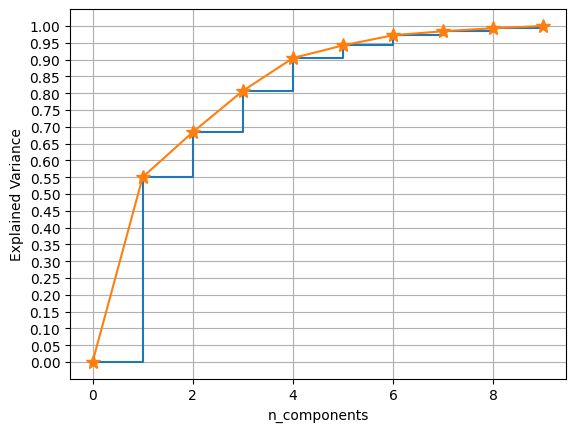

In [ ]:
#Finding optimal k in PCA
explained_variance_graph(scaled_data)

From above graph we can infer that for n_components = 5, nearly 95% of data is saved.

Therefore,

In [ ]:
pca = PCA(n_components = 5)
pca_data = pd.DataFrame(pca.fit_transform(scaled_data))

##Using grouping

<Axes: >

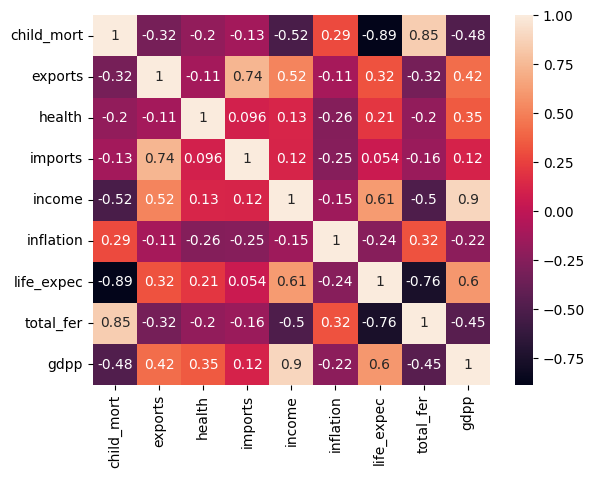

In [ ]:
sns.heatmap(data.corr(),annot = True)

In [ ]:
grp_data = pd.DataFrame()

grp_data['Mortality'] = (data['child_mort'] / data['child_mort'].mean()) + (data['life_expec'] / data['life_expec'].mean()) + (data['total_fer'] / data['total_fer'].mean())

grp_data['Trade'] = (data['imports'] / data['imports'].mean()) + (data['exports'] / data['exports'].mean())

grp_data['Finance'] = (data['income'] / data['income'].mean()) + (data['gdpp'] / data['gdpp'].mean())

grp_data['Health'] = (data['health'] / data['health'].mean())

grp_data['Inflation'] = data['inflation']/data['inflation'].mean()

grp_data = scale_it(grp_data)

#KMeans

##PCA reduced dataset

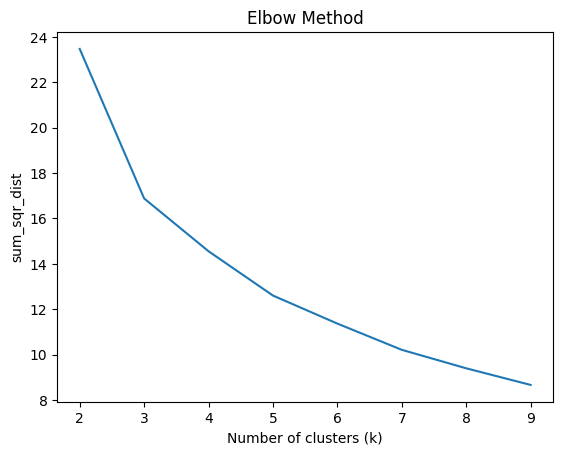

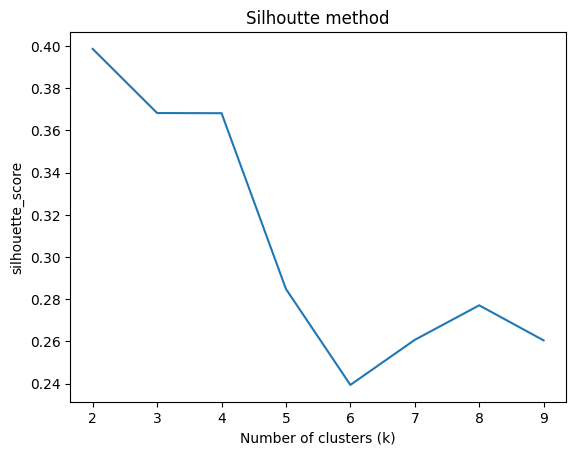

In [ ]:
#Elbow method and silhouette method
elbow_and_silhouette_graph(pca_data)

From above graph,

At k=3 , elbow is made in elbow graph, also silhouette score is appreciable.

In [ ]:
kmeans = KMeans(n_clusters=3,n_init=10,random_state=42)
kmeans.fit(pca_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
#Plotting world graph
world_graph(pca_data,kmeans,country)

<ipython-input-94-d31b68930b0d>:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Group reduced data

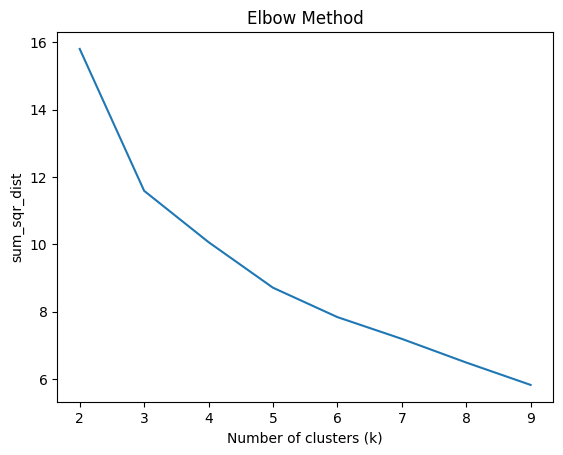

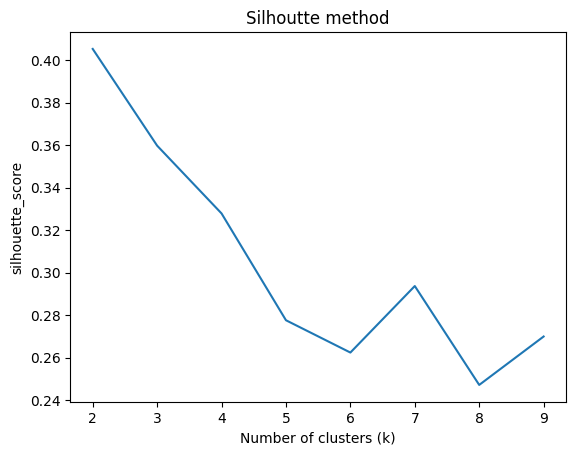

In [ ]:
#Elbow method and silhouette method
elbow_and_silhouette_graph(grp_data)

In [ ]:
kmeans = KMeans(n_clusters=3,n_init=10,random_state=42)
kmeans.fit(grp_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
#plotting world map
world_graph(grp_data,kmeans,country)

<ipython-input-94-d31b68930b0d>:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#DBSCAN

##PCA reduced data

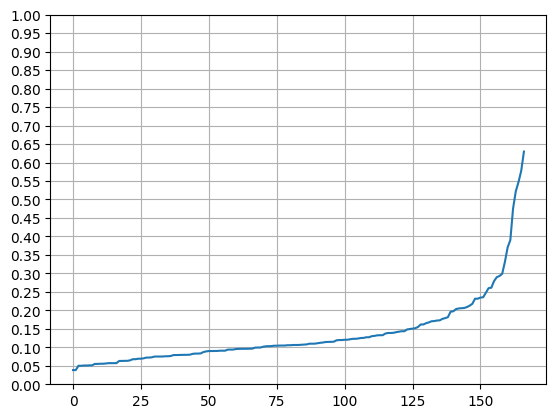

In [ ]:
#Finding optimised eps
optimal_eps(pca_data)

Optimal eps comes out to be 0.2. Because crook of the elbow is at eps = 0.2

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=10)
dbscan.fit(pca_data)
labels = dbscan.labels_

In [ ]:
#World map
world_graph(pca_data,dbscan,country)

<ipython-input-94-d31b68930b0d>:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Grouped reduced data

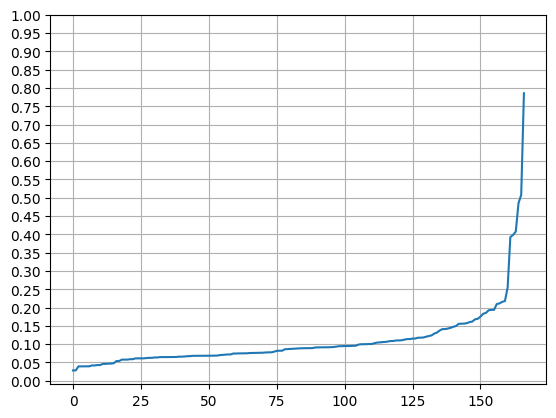

In [ ]:
#Finding optimised eps
optimal_eps(grp_data)

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=10)
dbscan.fit(grp_data)
labels = dbscan.labels_

In [ ]:
#World map
world_graph(grp_data,dbscan,country)

<ipython-input-94-d31b68930b0d>:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-94-d31b68930b0d>:66: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-94-d31b68930b0d>:67: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#Hierarichal Clustering

##PCA reduced data

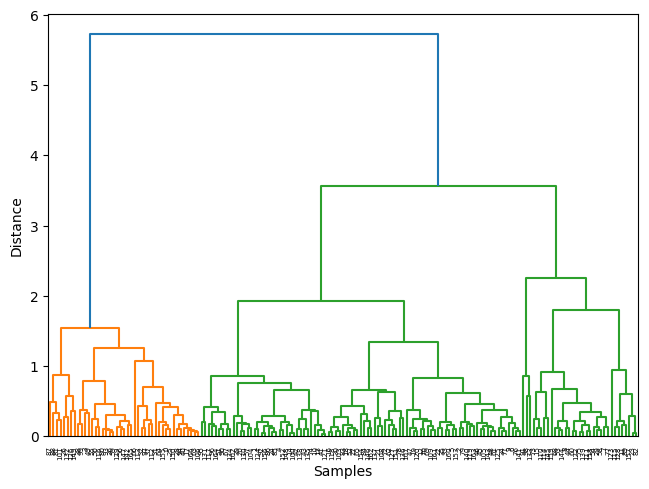

In [ ]:
#Linkage data
linkage_data = linkage(pca_data, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
#Hierarichal Clustering
aglo = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
aglo.fit(pca_data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [ ]:
#World map
world_graph(pca_data,aglo,country)

<ipython-input-94-d31b68930b0d>:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Group reduced data

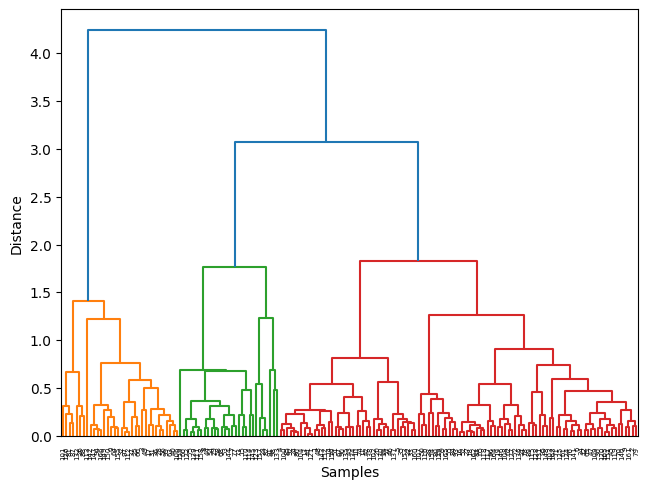

In [ ]:
#Linkage data
linkage_data = linkage(grp_data, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
#Hierarichal Clustering
aglo1 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
aglo1.fit(grp_data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [ ]:
#World map
world_graph(grp_data,aglo1,country)

<ipython-input-94-d31b68930b0d>:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

